In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sns.set_theme(color_codes=True)

In [3]:
df = pd.read_csv (r'Dataset\GPS_logs\veh117.csv')

In [4]:
df

,unixtime,latitude,longitude,speed
0,1202497203914,37.646473,-122.092656,0.020
1,1202497207912,37.646473,-122.092657,0.021
2,1202497210913,37.646473,-122.092657,0.023
3,1202497213913,37.646472,-122.092657,0.022
4,1202497216913,37.646472,-122.092657,0.017
...,...,...,...,...
6641,1202524478709,37.600128,-122.063406,0.028
6642,1202524481710,37.600128,-122.063406,0.027
6643,1202524485701,37.600128,-122.063406,0.024
6644,1202524489700,37.600129,-122.063406,0.021


In [5]:
print('unixtime to speed correlation coeff: ', pearsonr(df['unixtime'], df['speed'])[0])

print('latitude to speed correlation coeff: ', pearsonr(df['latitude'], df['speed'])[0])

print('longitude to speed correlation coeff: ', pearsonr(df['longitude'], df['speed'])[0])

unixtime to speed correlation coeff:  0.05741975317963772
latitude to speed correlation coeff:  0.08888520843941222
longitude to speed correlation coeff:  -0.09509266120417376


In [6]:
X = df.iloc[:, 0:3]

In [7]:
y = df.iloc[:, 3:4]

In [8]:
X = X.to_numpy()

In [9]:
y = y.to_numpy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65,test_size=0.35)
print ("X_train: ", X_train)
print("X_test: ", X_test)
print ("y_train: ", y_train)
print("y_test: ", y_test)

X_train:  [[ 1.20252415e+12  3.76072160e+01 -1.22067192e+02]
 [ 1.20252107e+12  3.75791443e+01 -1.22047520e+02]
 [ 1.20252158e+12  3.76095483e+01 -1.22068470e+02]
 ...
 [ 1.20251857e+12  3.76277459e+01 -1.22081464e+02]
 [ 1.20250796e+12  3.76017186e+01 -1.22062836e+02]
 [ 1.20251007e+12  3.76150045e+01 -1.22072293e+02]]
X_test:  [[ 1.20252032e+12  3.76421714e+01 -1.22091594e+02]
 [ 1.20252293e+12  3.75797336e+01 -1.22047979e+02]
 [ 1.20252053e+12  3.76256034e+01 -1.22080327e+02]
 ...
 [ 1.20251521e+12  3.76295921e+01 -1.22083130e+02]
 [ 1.20251762e+12  3.75791024e+01 -1.22047481e+02]
 [ 1.20251834e+12  3.76109148e+01 -1.22069452e+02]]
y_train:  [[43.938]
 [ 1.104]
 [11.015]
 ...
 [25.898]
 [58.763]
 [18.953]]
y_test:  [[50.918]
 [ 1.021]
 [35.298]
 ...
 [58.87 ]
 [ 1.051]
 [13.964]]


# Random Forest Regressor

In [11]:
RandomForestRegressorModel = RandomForestRegressor()

In [12]:
RandomForestRegressorModel.fit(X_train, y_train)

c:\users\yash\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [13]:
y_pred = RandomForestRegressorModel.predict(X_test)

In [14]:
y_pred

array([44.13632 ,  1.280245, 32.78335 , ..., 44.73253 ,  1.59268 ,
       12.97705 ])

In [15]:
y_pred = np.reshape(y_pred, (y_pred.shape[0], 1)) #np.array([1,2,3,4]).reshape(-1,1)

In [16]:
loss = y_pred - y_test

In [17]:
pd.DataFrame({'Prediction': list(ele[0] for ele in y_pred), 'Actual/Target': list(ele[0] for ele in y_test), 'Loss': list(ele[0] for ele in loss)})

,Prediction,Actual/Target,Loss
0,44.136320,50.918,-6.781680
1,1.280245,1.021,0.259245
2,32.783350,35.298,-2.514650
3,22.425020,21.350,1.075020
4,21.597050,16.763,4.834050
...,...,...,...
2322,59.996250,57.798,2.198250
2323,26.176370,52.275,-26.098630
2324,44.732530,58.870,-14.137470
2325,1.592680,1.051,0.541680


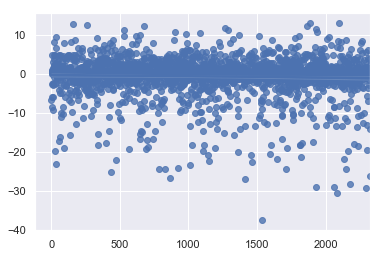

In [18]:
sns.regplot(x=list(i for i in range(y_test.shape[0])), y=list(ele[0] for ele in loss))
plt.show()

In [19]:
print('R2:', r2_score(list(ele[0] for ele in y_test), list(ele[0] for ele in y_pred)))
print('Test accuracy score:', RandomForestRegressorModel.score(X_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, list(ele[0] for ele in y_pred)))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, list(ele[0] for ele in y_pred))))
# print('Mean Squared Error:', mean_squared_error(y_test, list(ele[0] for ele in linreg.predict(X_test))))  
# print('Train accuracy score:', linreg.score(y_train, linreg.predict(X_train)))
# print('Test accuracy score:', linreg.score(y_test,linreg.predict(X_test)))
# print('Train accuracy score:', linreg.score(X_train, y_train))


R2: 0.9456158108161337
Test accuracy score: 0.9456158108161337
Mean Absolute Error: 2.7617597828194427
Root Mean Squared Error: 4.945445926034683


In [20]:
RandomForestRegressorModel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [23]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [24]:
rf_random = RandomizedSearchCV(estimator = RandomForestRegressorModel , param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [25]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 30.8min finished
c:\users\yash\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [26]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(rf_random, open(filename, 'wb'))

In [27]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [28]:
rf_random.best_estimator_.score(X_test, y_test)

0.9482399361421516

# Linear Regression

In [11]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = linreg.predict(X_test)

In [13]:
y_pred

array([[27.52330523],
       [23.34849726],
       [25.83169489],
       ...,
       [28.41901363],
       [26.4120794 ],
       [21.42176786]])

In [14]:
loss = y_pred - y_test

In [15]:
pd.DataFrame({'Prediction': list(ele[0] for ele in y_pred), 'Actual/Target': list(ele[0] for ele in y_test), 'Loss': list(ele[0] for ele in loss)})

,Prediction,Actual/Target,Loss
0,27.523305,55.932,-28.408695
1,23.348497,21.127,2.221497
2,25.831695,19.651,6.180695
3,27.591328,16.763,10.828328
4,26.021397,0.015,26.006397
...,...,...,...
2322,29.101613,38.254,-9.152387
2323,27.049863,23.580,3.469863
2324,28.419014,18.572,9.847014
2325,26.412079,44.663,-18.250921


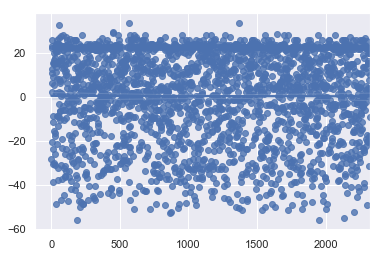

In [16]:
sns.regplot(x=list(i for i in range(y_test.shape[0])), y=list(ele[0] for ele in loss))
plt.show()

In [17]:
print('R2:', r2_score(list(ele[0] for ele in y_test), list(ele[0] for ele in y_pred)))
print('Test accuracy score:', linreg.score(X_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, list(ele[0] for ele in y_pred)))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, list(ele[0] for ele in y_pred))))

R2: 0.022572022927182966
Test accuracy score: 0.022572022927182966
Mean Absolute Error: 17.5066154050033
Root Mean Squared Error: 20.826011245444775


# SVR

In [19]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [20]:
SVRModel = SVR(kernel = 'rbf')
SVRModel.fit(X_train, y_train)

c:\users\yash\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [21]:
y_pred = SVRModel.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [22]:
loss = y_pred - y_test

In [23]:
y_pred = y_pred.reshape(-1,1)

In [24]:
pd.DataFrame({'Prediction': list(ele[0] for ele in y_pred), 'Actual/Target': list(ele[0] for ele in y_test), 'Loss': list(ele[0] for ele in loss)})

,Prediction,Actual/Target,Loss
0,-0.706309,23.394,-24.100309
1,-0.706309,54.325,-55.031309
2,-0.706309,22.554,-23.260309
3,-0.706309,0.801,-1.507309
4,-0.706309,30.845,-31.551309
...,...,...,...
2322,-0.706309,29.868,-30.574309
2323,-0.706309,27.651,-28.357309
2324,-0.706309,35.738,-36.444309
2325,-0.706309,17.442,-18.148309


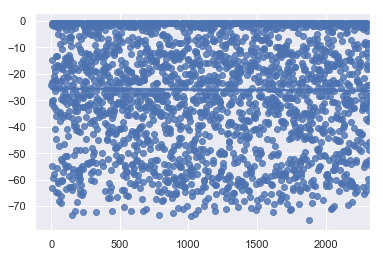

In [25]:
sns.regplot(x=list(i for i in range(y_test.shape[0])), y=list(ele[0] for ele in loss))
plt.show()

In [26]:
print('R2:', r2_score(list(ele[0] for ele in y_test), list(ele[0] for ele in y_pred)))
print('Test accuracy score:', SVRModel.score(X_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, list(ele[0] for ele in y_pred)))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, list(ele[0] for ele in y_pred))))

R2: -1.5032235882686384
Test accuracy score: -1.5032235882686384
Mean Absolute Error: 26.02904151638271
Root Mean Squared Error: 33.588932869668774


# KNN

In [11]:
knnModel = KNeighborsRegressor()
knnModel.fit(X_train, y_train)

KNeighborsRegressor()

In [12]:
y_pred = knnModel.predict(X_test)

In [13]:
loss = y_pred - y_test

In [14]:
pd.DataFrame({'Prediction': list(ele[0] for ele in y_pred), 'Actual/Target': list(ele[0] for ele in y_test), 'Loss': list(ele[0] for ele in loss)})

,Prediction,Actual/Target,Loss
0,12.0356,11.475,0.5606
1,49.9070,48.512,1.3950
2,20.2288,26.313,-6.0842
3,17.6890,16.656,1.0330
4,0.4966,0.188,0.3086
...,...,...,...
2322,11.5906,6.718,4.8726
2323,11.3790,15.292,-3.9130
2324,32.2570,29.699,2.5580
2325,3.3264,9.405,-6.0786


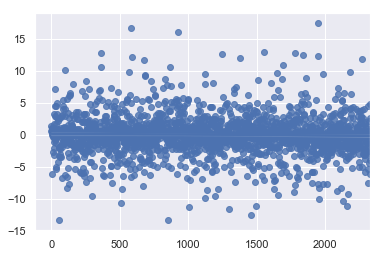

In [15]:
sns.regplot(x=list(i for i in range(y_test.shape[0])), y=list(ele[0] for ele in loss))
plt.show()

In [16]:
print('R2:', r2_score(list(ele[0] for ele in y_test), list(ele[0] for ele in y_pred)))
print('Test accuracy score:', knnModel.score(X_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, list(ele[0] for ele in y_pred)))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, list(ele[0] for ele in y_pred))))

R2: 0.9816113325958779
Test accuracy score: 0.9816113325958779
Mean Absolute Error: 1.7928872367855608
Root Mean Squared Error: 2.8498282023959733
